In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [231]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# BUSINESS UNDERSTANDING : 

Objective:
To generate mood-based Spotify playlists by clustering songs based on audio features like danceability, energy, tempo, and liveness. The end goal is to create distinct clusters that represent different moods (e.g., "Energetic", "Relaxing", "Uplifting") for personalized playlist recommendations.

Key Questions:
1)What features contribute most to mood differentiation?
2)How many clusters (moods) should we create?

# Exploratory Data Analysis

Examine distribution of features using histogram and boxplots

In [234]:
#Checking the missing values 
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [235]:
print(df[df.isna().any(axis=1)])
#CHeck the missinig value

       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


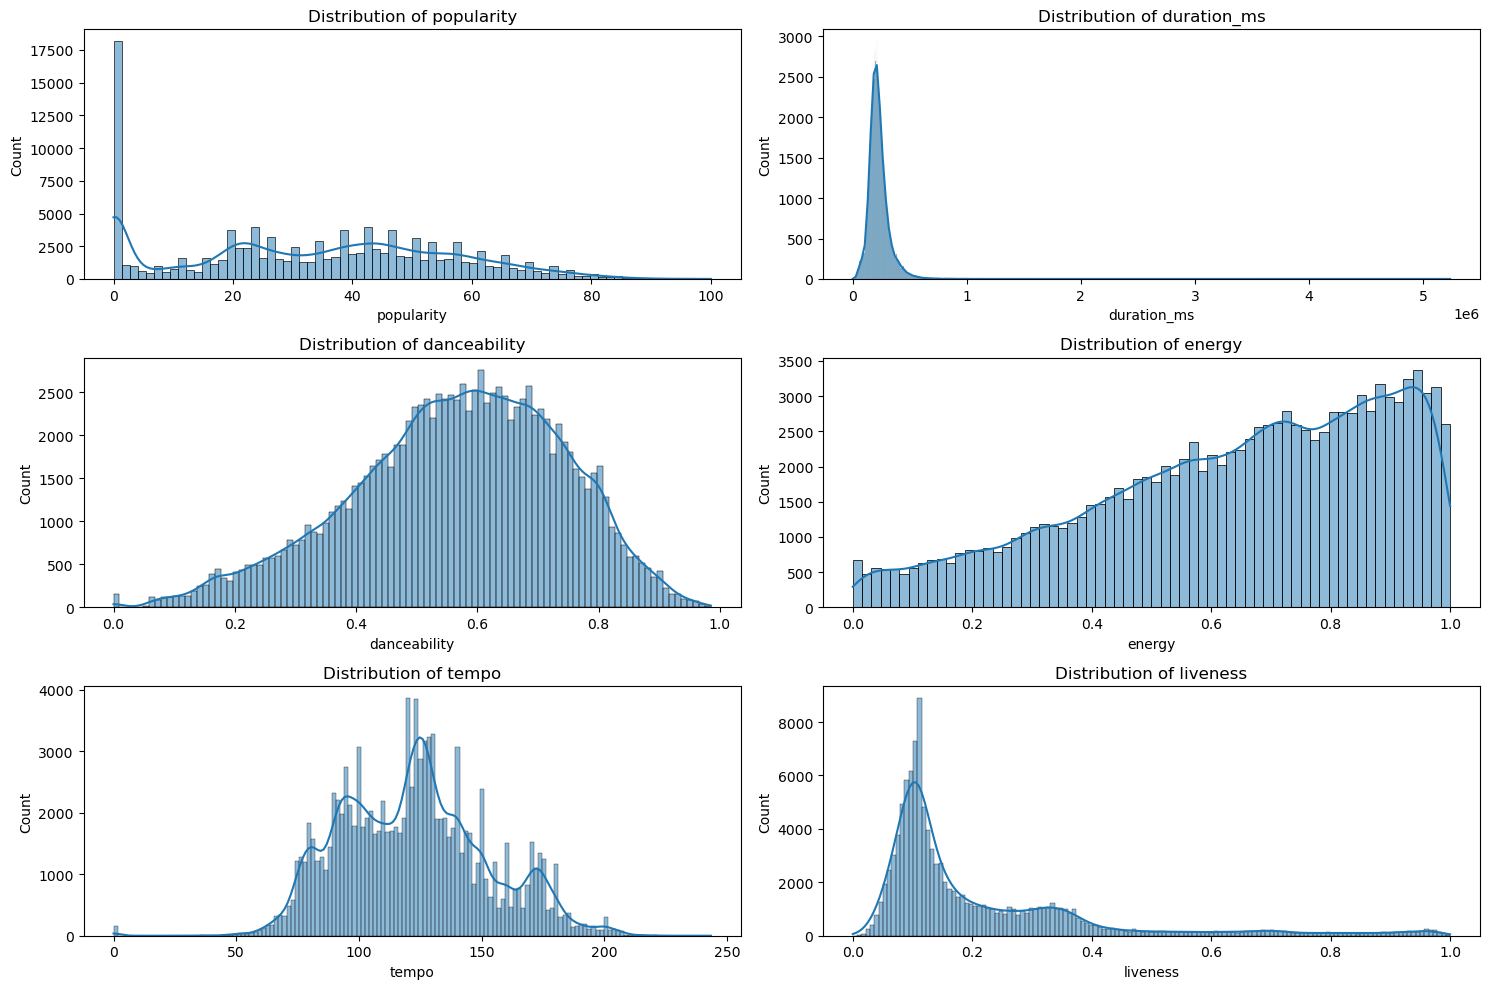

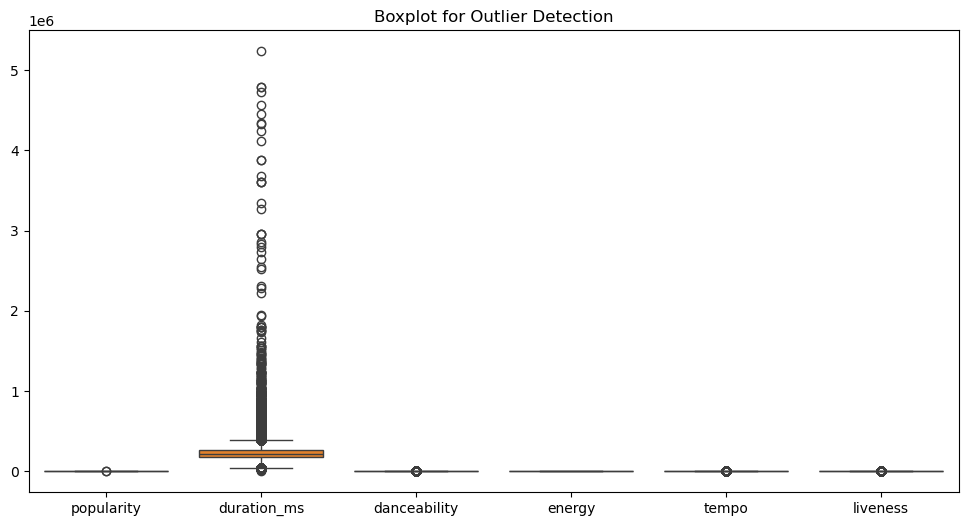

In [236]:
#Visualizing data to check outliers

numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'tempo', 'liveness']

# Adjusting the number of rows and columns to fit all 6 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))  # 3 rows, 2 columns
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])  # Correcting boxplot syntax
plt.title("Boxplot for Outlier Detection")
plt.show()


# Data preparation:

1)Log transformation

2)Standard Scaling

3)Visualizing effect of log transformation and Standard Scaling


In [238]:
#Dropping the row since no critical information is given which could help us find the data
cleaned_df = df.dropna().copy()
cleaned_df.isna().sum()
cleaned_df = cleaned_df.drop(columns=['Unnamed: 0'])
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113995,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113996,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113997,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [239]:
print(cleaned_df['track_genre'].unique())
print(cleaned_df['artists'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [240]:
#Since cardinality of artists is alot , so we can do either frequency encoding or target encoding
# One-hot encoding for track_genre
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_genres = pd.DataFrame(encoder.fit_transform(cleaned_df[['track_genre']]), columns=encoder.get_feature_names_out(['track_genre']))

# Frequency encoding for artists
artist_frequency = cleaned_df['artists'].value_counts().to_dict()
cleaned_df['artist_freq_encoded'] = cleaned_df['artists'].map(artist_frequency)

# Drop the old 'track_genre' and 'artists' columns
cleaned_df = cleaned_df.drop(columns=['track_genre', 'artists'])

# Concatenate the encoded columns
cleaned_df = pd.concat([cleaned_df, encoded_genres], axis=1)

# Now cleaned_df has one-hot encoded 'track_genre' and frequency encoded 'artists'

In [241]:
cleaned_df

,track_id,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,5SuOikwiRyPMVoIQDJUgSV,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6lfxq3CG4xtTiEg7opyCyx,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5vjLSffimiIP26QG5WcN2K,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,2C3TZjDRiAzdyViavDJ217,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113995,1hIz5L4IB9hN3WRYPOCGPw,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113996,6x8ZfSoqDjuNa5SVP5QjvX,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,2e6sXL2bYv4bSz6VTdnfLs,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [242]:
print(cleaned_df.isna().sum())


track_id                   0
album_name                 0
track_name                 0
popularity                 0
duration_ms                0
                          ..
track_genre_techno         0
track_genre_trance         0
track_genre_trip-hop       0
track_genre_turkish        0
track_genre_world-music    0
Length: 133, dtype: int64


In [243]:
#Data is ready to scale so keeping the record on irrelevant columns in a separate dataframe

track_info = cleaned_df[['track_id','track_name','album_name']]
cleaned_df = cleaned_df.drop(columns = ['track_id','track_name','album_name'], axis=1)

In [244]:
#Since, popularity, duration_ms, and liveness are right skewed, we will do normalization(log transformation) to reduce the impact of extreme values

cleaned_df['popularity'] = np.log1p(cleaned_df['popularity'])
cleaned_df['duration_ms'] = np.log1p(cleaned_df['duration_ms'])
cleaned_df['liveness'] = np.log1p(cleaned_df['liveness'])

In [245]:
#For danceability, energy and tempo , we can do standard scaling as the distribution looks normal

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cleaned_df[['danceability', 'energy', 'tempo']] = scaler.fit_transform(cleaned_df[['danceability', 'energy', 'tempo']])

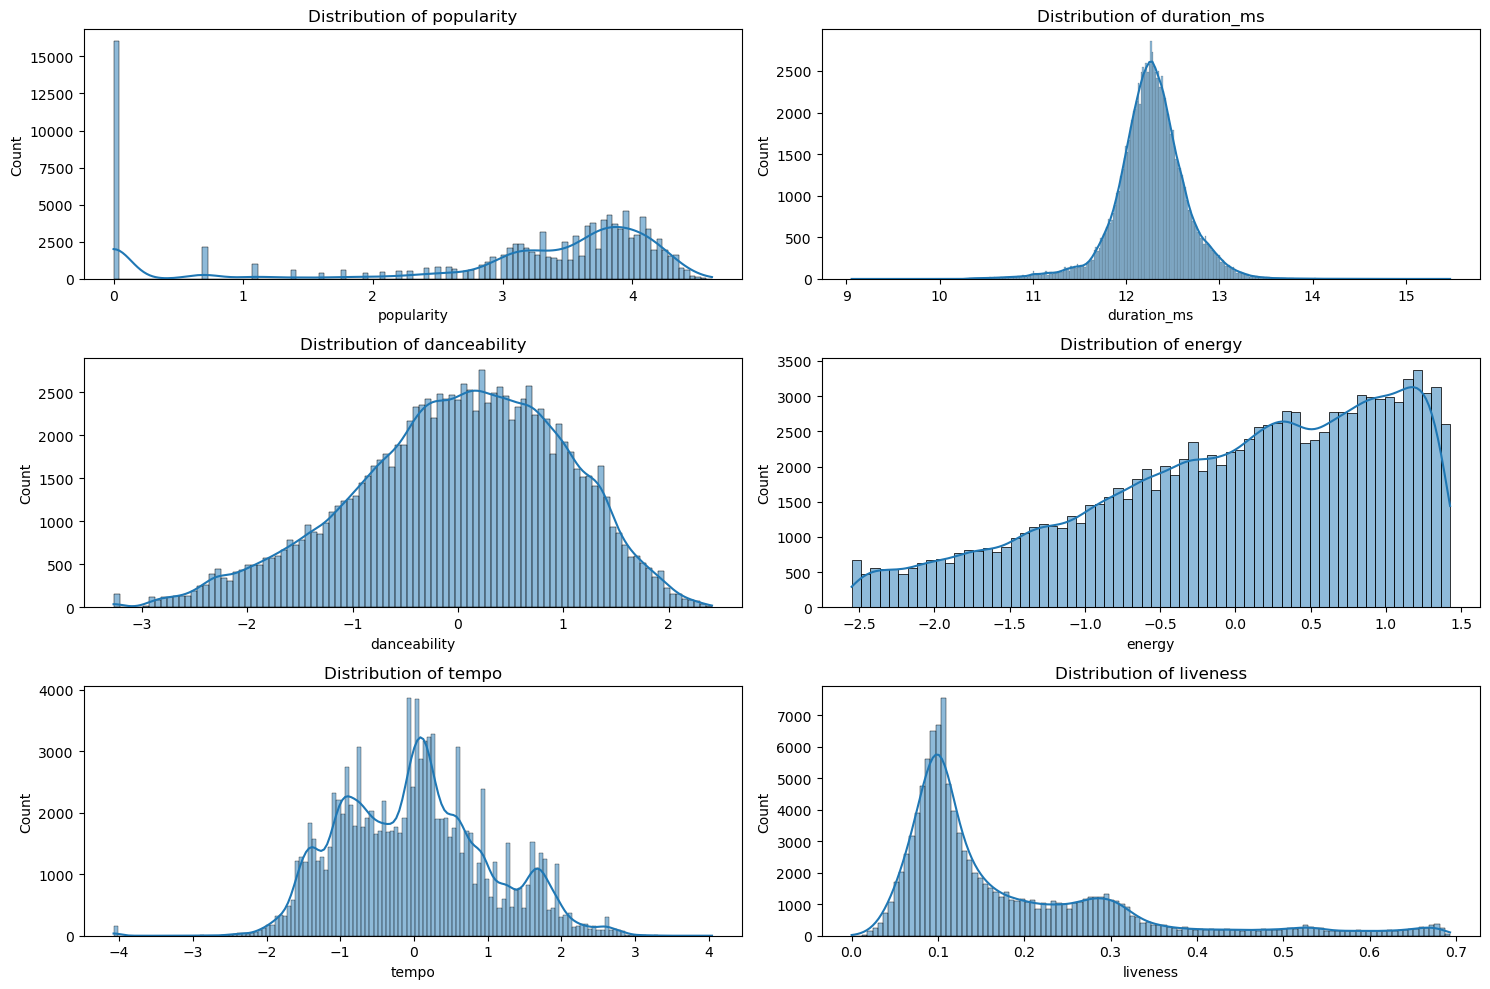

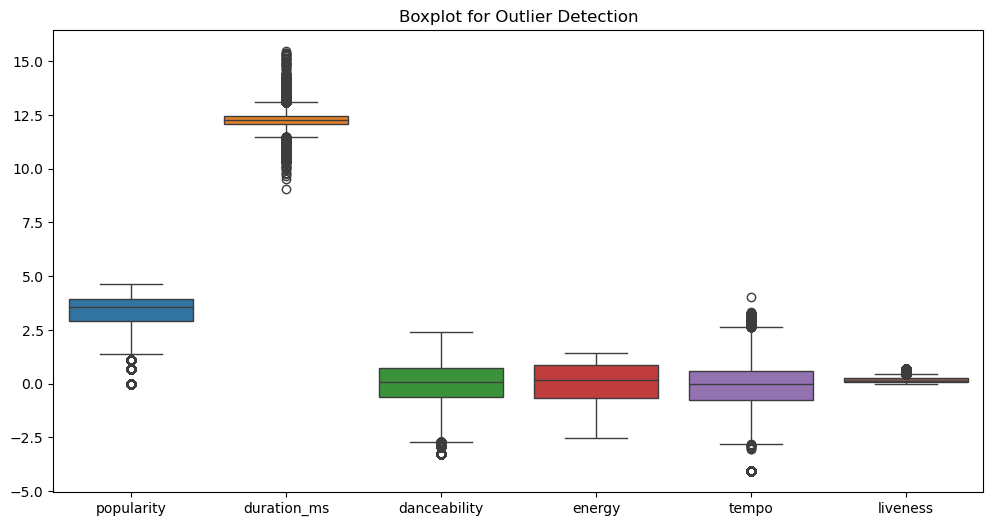

In [246]:
#Visualizing again to check the effect of normalization and scaling

numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'tempo', 'liveness']

# Adjusting the number of rows and columns to fit all 6 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))  # 3 rows, 2 columns
for i, col in enumerate(numerical_columns):
    sns.histplot(cleaned_df[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df[numerical_columns]) 
plt.title("Boxplot for Outlier Detection")
plt.show()


# ML MODEL

Elbow method to find optimal value of k

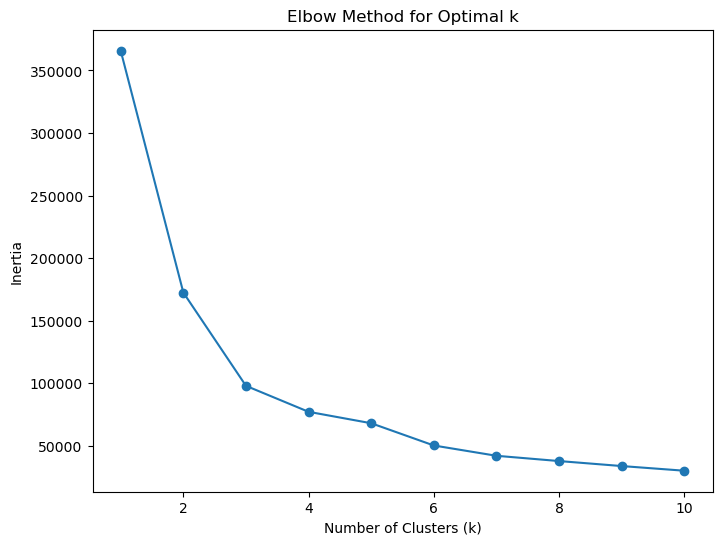

In [248]:

# Try a range of k values
inertia = []
k_range = range(1, 11)  # Try k from 1 to 10

X = cleaned_df[numerical_columns].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) 


for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)  # Use the PCA-transformed data
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


# 1) K-means clustering

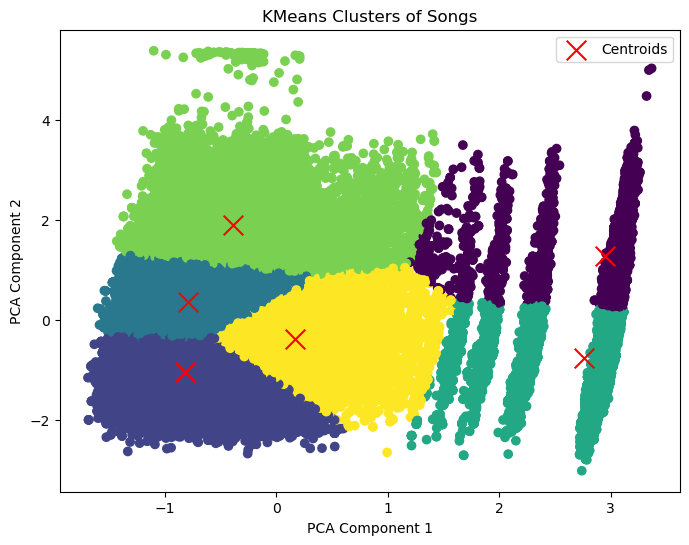

In [250]:
#Testing with k=6

# Apply KMeans clustering with KMeans++ initialization
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=23316144)
kmeans.fit(X_pca)

# Get the cluster centers and labels
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')  # Red crosses for centroids
plt.title('KMeans Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [251]:
silhouette_avg = silhouette_score(X_pca, labels)
db_score = davies_bouldin_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {db_score}")


Silhouette Score: 0.3987307242571031
Davies-Bouldin Score: 0.8203497807058575


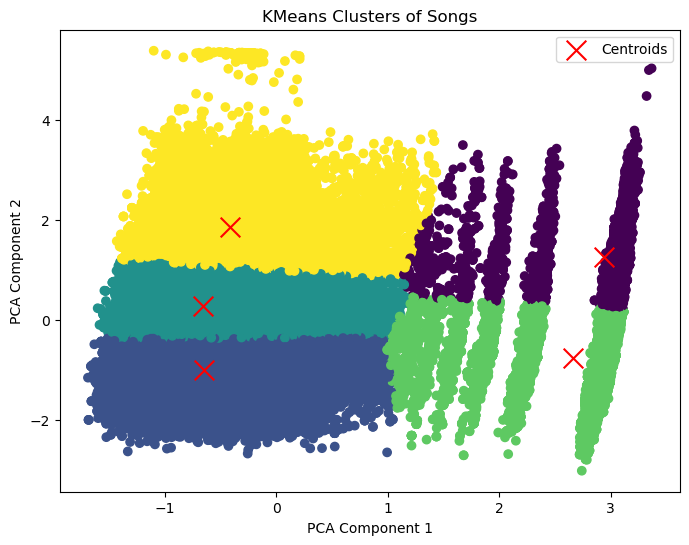

In [252]:
# Apply KMeans clustering with KMeans++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=23316144)
kmeans.fit(X_pca)

# Get the cluster centers and labels
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')  # Red crosses for centroids
plt.title('KMeans Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [253]:
silhouette_avg = silhouette_score(X_pca, labels)
db_score = davies_bouldin_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {db_score}")


Silhouette Score: 0.4014172230957034
Davies-Bouldin Score: 0.8169945959664661


# Building playlist

k = 5 is optimal so will now create a playlist and remove unrelated columns

In [255]:
# We already have the cluster labels from KMeans
cleaned_df['Cluster'] = kmeans.labels_  # Add the cluster labels to the DataFrame
cleaned_df['Cluster'].unique()

array([4, 2, 1, 3, 0])

In [256]:
cleaned_df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       ...
       'track_genre_study', 'track_genre_swedish', 'track_genre_synth-pop',
       'track_genre_tango', 'track_genre_techno', 'track_genre_trance',
       'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music', 'Cluster'],
      dtype='object', length=131)

# FORMING CLUSTER BASED ON FEATURE GRAPH

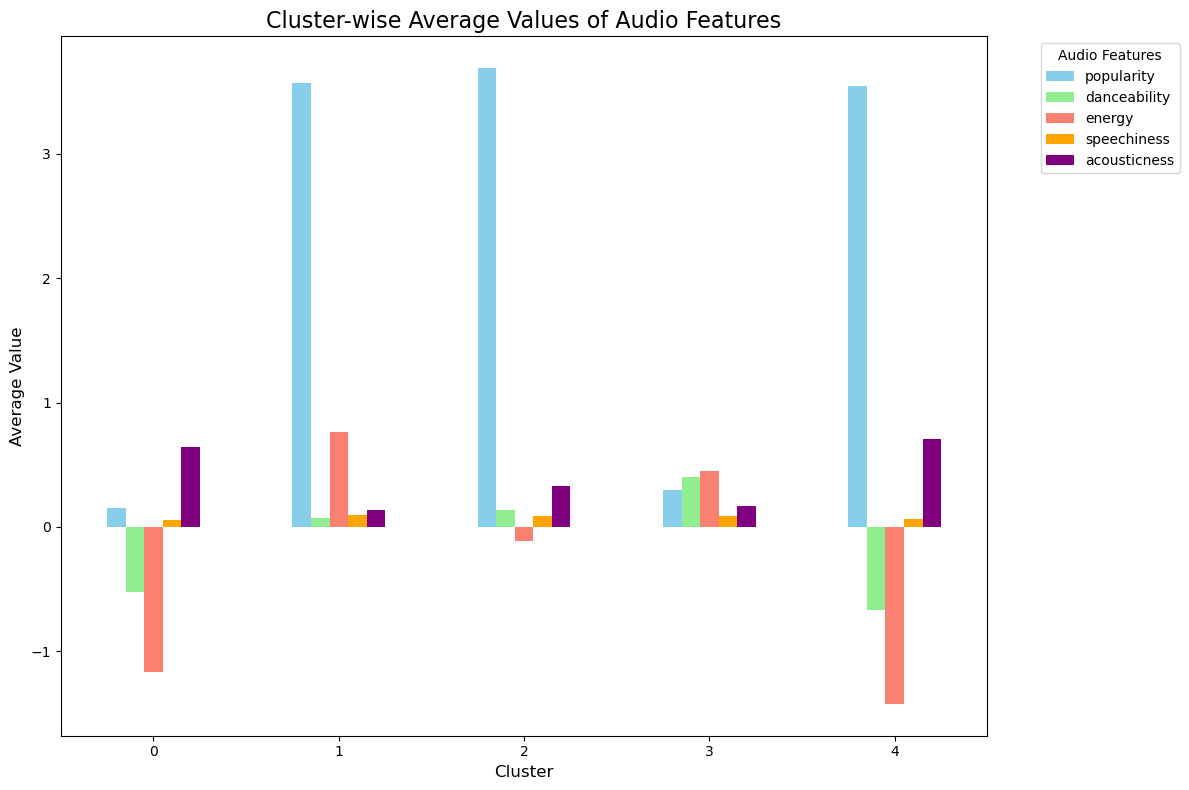

In [258]:
# Define the audio features to analyze
audio_features = ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness']

# Group by 'Cluster' and calculate the mean for each audio feature
cluster_means = cleaned_df.groupby('Cluster')[audio_features].mean()

# Plot a grouped bar plot
cluster_means.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])

# Add titles and labels
plt.title('Cluster-wise Average Values of Audio Features', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Audio Features', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [259]:
"""
Based on the bar graph , we can define cluster as followings:

    0: "Acoustic & Mellow",
    1: "Popular Hits",
    2: "Upbeat Instrumentals",
    3: "Live Performances & Spoken",
    4: "High-Energy Rhythms",

"""

cluster_genres = {
    0: "Acoustic & Mellow",
    1: "Popular Hits",
    2: "Upbeat Instrumentals",
    3: "Live Performances & Spoken",
    4: "High-Energy Rhythms",
}



# Define the function to label clusters based on observations
def label_clusters(row):
    """
    Assign descriptive labels to clusters based on their characteristics.
    Adjust the labels based on feature analysis and observations.
    """
    if row['Cluster'] == 0:
        return 'Acoustic & Mellow' 
    elif row['Cluster'] == 1:
        return 'Popular Hits'  
    elif row['Cluster'] == 2:
        return 'Upbeat Instrumentals'  
    elif row['Cluster'] == 3:
        return 'Live Performances & Spoken' 
    elif row['Cluster'] == 4:
        return 'High-Energy Rhythms'  
    else:
        return 'Unknown Cluster'  # Default label for any unexpected clusters


# Apply the function to your cleaned dataset to create a new 'Cluster_Label' column
cleaned_df['Cluster_Label'] = cleaned_df.apply(label_clusters, axis=1)

# Display the cleaned dataframe with the new cluster labels
print(cleaned_df[['Cluster', 'Cluster_Label']].head())

# Optionally, you can also count how many songs are in each label to verify the distribution
print(cleaned_df['Cluster_Label'].value_counts())


   Cluster         Cluster_Label
0        4   High-Energy Rhythms
1        4   High-Energy Rhythms
2        4   High-Energy Rhythms
3        2  Upbeat Instrumentals
4        2  Upbeat Instrumentals
Cluster_Label
Upbeat Instrumentals          40579
Popular Hits                  36820
High-Energy Rhythms           15747
Live Performances & Spoken    14398
Acoustic & Mellow              6455
Name: count, dtype: int64


In [260]:
merged_df = pd.concat([track_info, cleaned_df], axis=1)

playlist_df = merged_df[['track_name', 'album_name', 'Cluster_Label']]
playlist_df


,track_name,album_name,Cluster_Label
0,Comedy,Comedy,High-Energy Rhythms
1,Ghost - Acoustic,Ghost (Acoustic),High-Energy Rhythms
2,To Begin Again,To Begin Again,High-Energy Rhythms
3,Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...,Upbeat Instrumentals
4,Hold On,Hold On,Upbeat Instrumentals
...,...,...,...
113994,Sleep My Little Boy,#mindfulness - Soft Rain for Mindful Meditatio...,High-Energy Rhythms
113995,Water Into Light,#mindfulness - Soft Rain for Mindful Meditatio...,High-Energy Rhythms
113996,Miss Perfumado,Best Of,Upbeat Instrumentals
113997,Friends,Change Your World,Upbeat Instrumentals


In [261]:
# Group the songs by 'Cluster_Label'
grouped_playlists = playlist_df.groupby('Cluster_Label')

# Print only the first 5 songs in each cluster
for cluster_label, group in grouped_playlists:
    print(f"Playlist for {cluster_label}:")
    print(group[['track_name', 'album_name']].head(5).to_string(index=False))  # Show only the top 5
    print("\n" + "="*50 + "\n")


Playlist for Acoustic & Mellow:
             track_name                         album_name
           Party of One       Human - Best Adult Pop Tunes
           Party of One Feeling Good - Adult Pop Favorites
           Party of One                  Mellow Bars R'n'B
  Lonely This Christmas             Chill Christmas Dinner
Throwing Good After Bad                    rainy day indie


Playlist for High-Energy Rhythms:
      track_name                  album_name
          Comedy                      Comedy
Ghost - Acoustic            Ghost (Acoustic)
  To Begin Again              To Begin Again
   Say Something Is There Anybody Out There?
          Hunger                      Hunger


Playlist for Live Performances & Spoken:
       track_name                         album_name
 93 Million Miles                      Coffee Moment
         Unlonely       Human - Best Adult Pop Tunes
       Bella Luna                   Mellow Adult Pop
Winter Wonderland              Holly Jolly Christmas
